In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *
from itertools import zip_longest
from skimage import io
import re


In [115]:
path=Path('I:\\XRD\XCT_CARL\summed')

In [116]:
pores=list(path.glob('**/*sample*_pores_z_uint16.tiff'))
contours=list(path.glob('**/*sample*_contour_z_eroded_filled.tiff'))
oxides=list(path.glob('**/*sample*_oxides_z_uint16.tiff'))
pores_y=list(path.glob('**/*sample*_oxides_y.tiff'))

In [117]:
pores,contours,oxides,pores_y

([WindowsPath('I:/XRD/XCT_CARL/summed/3mm/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median_sample_1_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/3mm/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median_sample_2_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/3mm/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median_sample_3_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/3mm/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median_sample_4_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample_1_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample_2_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample_3_pores_z_uint16.tiff'),
  WindowsPath('I:/XRD/X

In [118]:
df=pd.DataFrame()
fnames=[]
folder=[]
oxide_px=[]
pore_px=[]
contour_px=[]
stack_height=[]
for p in zip_longest(pores,contours,oxides,pores_y):
    pores_img=io.imread(p[0])
    contour_img=io.imread(p[1])
    oxides_img=io.imread(p[2])
    file_name=m=re.search('sample.*\d',p[0].stem)
    fnames.append(file_name.group(0))
    folder.append(p[0].parent.stem)
    pore_px.append(np.sum(pores_img))
    oxide_px.append(np.sum(oxides_img))
    contour_px.append(np.sum(contour_img)/255)
    stack_height.append(io.imread(p[3]).shape[0])

In [119]:
pores[0]

WindowsPath('I:/XRD/XCT_CARL/summed/3mm/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median_sample_1_pores_z_uint16.tiff')

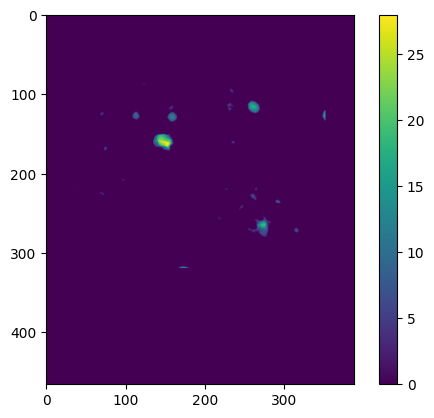

In [120]:
pores_img=io.imread(pores[2])
plt.imshow(pores_img)
plt.colorbar()

In [121]:
np.unique(contour_img)

array([  0, 255], dtype=uint8)

In [122]:

pores_img.shape

(466, 388)

In [123]:
print(df)

Empty DataFrame
Columns: []
Index: []


In [124]:
pores_img.shape

(466, 388)

In [125]:
df=pd.DataFrame({'fname': fnames,'folder': folder,'oxide_px': oxide_px,'pore_px':pore_px,'contour_px':contour_px,'stack_height':stack_height})
                

In [126]:
df['oxide_percentage']=df['oxide_px']/(df['contour_px']*df['stack_height'])
df['pore_percentage']=df['pore_px']/(df['contour_px']*df['stack_height'])

In [127]:
df

,fname,folder,oxide_px,pore_px,contour_px,stack_height,oxide_percentage,pore_percentage
0,sample_1_pores_z_uint16,3mm,194,2433,416721.0,466,9.990114e-07,1.252884e-05
1,sample_2_pores_z_uint16,3mm,959,3088744,403733.0,466,5.097279e-06,1.641730e-02
2,sample_3_pores_z_uint16,3mm,5296,13196,402640.0,466,2.822573e-05,7.032981e-05
3,sample_4_pores_z_uint16,3mm,1073,48234,390508.0,466,5.896358e-06,2.650559e-04
4,sample_1_pores_z_uint16,head,7240,52,366680.0,389,5.075768e-05,3.645579e-07
5,sample_2_pores_z_uint16,head,810,1214,443124.0,531,3.442431e-06,5.159396e-06
6,sample_3_pores_z_uint16,head,3365,1677,373274.0,389,2.317436e-05,1.154930e-05
7,sample_4_pores_z_uint16,head,121016,107,391134.0,411,7.527927e-04,6.656047e-07


In [130]:
import seaborn as sns

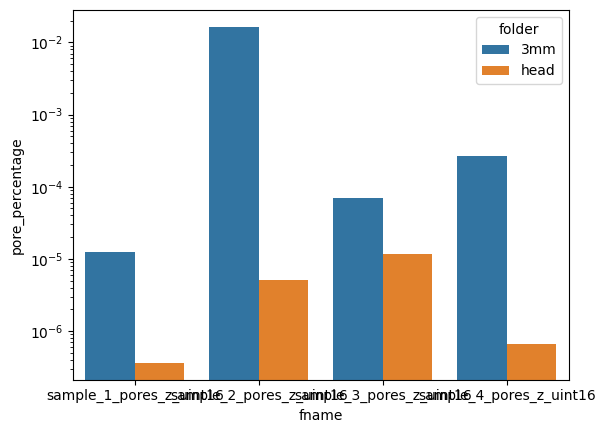

In [133]:
sns.barplot(data=df,hue='folder',x='fname',y='pore_percentage')
plt.yscale('log')

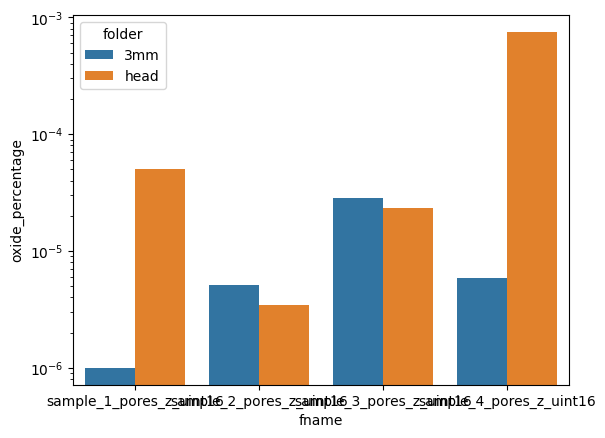

In [132]:
sns.barplot(data=df,hue='folder',x='fname',y='oxide_percentage')
plt.yscale('log')

In [107]:
m=re.search('sample.*\d','sample_4')    
# p[0].stem
m.group(0)

'sample_4'

TypeError: Image data of dtype object cannot be converted to float

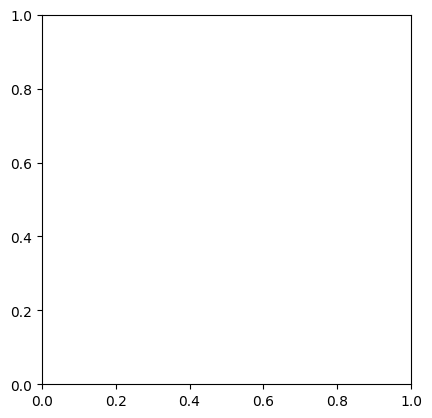

In [60]:
plt.imshow(pores)
plt.colorbar()
# np.sum(pores)/np.sum()

In [38]:
pores[np.where(pores<50)[0],np.where(pores<50)[1]].shape

(164227, 4)

In [35]:
pores.shape

(411, 436, 4)

In [26]:
path

(WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample4_pores_z.tiff'),
 WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample4_pores_contour_z_eroded_filled.tiff'),
 WindowsPath('I:/XRD/XCT_CARL/summed/head/230928_SFB_IMM_BERNERS_V50-45_6um_80kV_5s_LE3_recon_8bit_median_sample4_oxides_z.tiff'))

In [15]:
for path in [pores,contours,oxides]:
    print(':)')

:)
:)
:)
